ZADANIE 1: Narysuj wykres liniowy prezentujący miesięczne temperatury w Warszawie
i Miami. W tym celu wykonaj następujące kroki:
przygotuj dane dla dwóch miast;
narysuj wykres liniowy dla każdego z miast;
dostosuj wygląd każdego z wykresów liniowych tak, aby się
wyróżniały;
dostosuj (jeżeli potrzeba) zakres osi Y odpowiadającej wartościom
temperatury tak, żeby żadne dane na wykresie nie były ”ucięte”;
dodaj do wykresu legendę – spróbuj we własnym zakresie znaleźć
odpowiednią komendę;
zapisz wygenerowany rysunek jako png (opcjonalnie dostosuj wartość
dpi tak, aby poprawić czytelność wykresu).

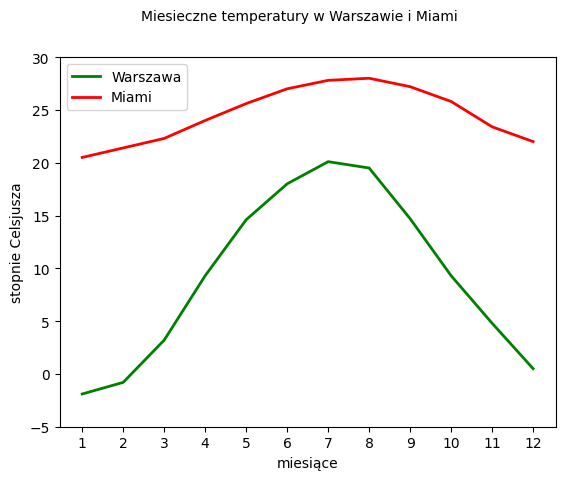

In [ ]:
#ZADANIE 1

import matplotlib.pyplot as plt
import numpy as np

miesiace = [i for i in range(1,13)]   
miasta = ['Warszawa', 'Miami']   
temp_W = [-1.9,-0.8,3.2,9.3,14.6,18,20.1,19.5,14.7,9.3,4.8,0.5] 
temp_M = [20.5,21.4,22.3,24,25.6,27,27.8,28,27.2,25.8,23.4,22]       

figure,ax = plt.subplots()
ax.plot(miesiace,temp_W,"g",linewidth=2.0,label='Warszawa') #label określa, co będzie w legendzie
ax.plot(miesiace,temp_M,color='red',linewidth=2.0, label='Miami')

figure.suptitle("Miesieczne temperatury w Warszawie i Miami", fontsize = 10)

ax.set(frame_on=True, ylim=(-5,30), xticks=np.arange(1,13,1), xlabel='miesiące', ylabel='stopnie Celsjusza')  #xticks to etykiety dla osi x, krok jest ustawiony na co 1
ax.legend() #dodanie legendy

plt.savefig('/content/drive/MyDrive/wykresy zadania/Miesieczne temperatury w Warszawie i Miami.png', dpi=200)
#rysunek
plt.show()

ZADANIE 2: W pliku dołączonym do zadania dostępne są wyniki działania zestawu algorytmów rozwiązujących problem wyszukiwania cyklu Hamiltona w grafie. W tym zadaniu transportowym chodzi o znalezienie najkrótszej (pod względem odległości) ścieżki przechodzącej przez wszystkie punkty. Przykładem takiego problemu może być dobór tras dla autobusów wyjeżdżających z zajezdni. W powyższym zagadnieniu analizowano trzy różne algorytmy, które iteracyjnie (przez 100 kolejnych iteracji) budowały rozwiązanie. wczytaj dane dla każdego z algorytmów i przedstaw zależność pomiędzy liczbą iteracji a jakością rozwiązania (długością trasy); dodaj na wykres elementy takie jak tytuł, podpisy osi, legenda; wykres liniowy dla najlepszego algorytmu pokoloruj na zielono i wyróżnij pogrubionym stylem linii; zapisz wygenerowany rysunek jako png (opcjonalnie dostosuj wartość dpi tak, aby poprawić czytelność wykresu).

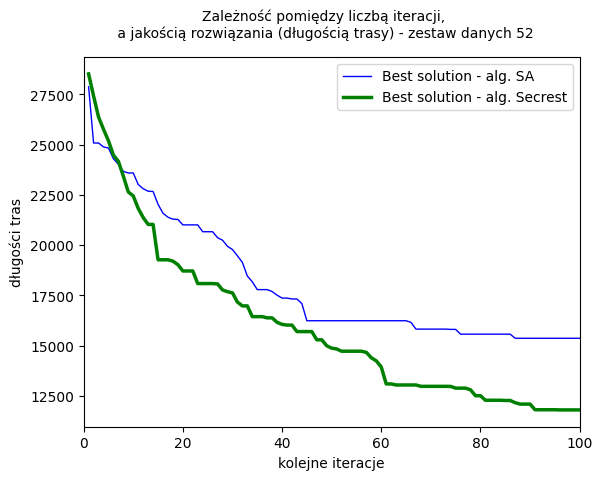

In [ ]:
#ZADANIE 2

import pandas

#wczytanie danych do data frame
path_SA = '/content/drive/MyDrive/wykresy zadania/Zadanie I - 2/52/SA/best solution.txt'
path_Secrest = '/content/drive/MyDrive/wykresy zadania/Zadanie I - 2/52/Secrest/best solution.txt'

df_SA = pandas.read_fwf(path_SA,header=None).head(100)  #brak nagłówka, wczytuję pierwsze 100 wierszy
df_Secrest = pandas.read_fwf(path_Secrest,header=None).head(100)

df_SA[0] = df_SA[0].replace(',','.', regex=True).astype(float)  #zamieniam przecinki na kropki
df_Secrest[0] = df_Secrest[0].replace(',','.', regex=True).astype(float)

#zmieniam na array:
df_SA = df_SA.to_numpy()
df_Secrest = df_Secrest.to_numpy()

#Rysowanie wykresu

import matplotlib.pyplot as plt
import numpy as np  

x = [i for i in range(1,101)]   #jest lista od 1 do 100 (chcę od 1 iteracji do 100)
y_SA = df_SA
y_Secrest = df_Secrest

figure,ax = plt.subplots()
ax.plot(x,y_SA,"blue",linewidth=1.0,label='Best solution - alg. SA') #label określa, co będzie w legendzie
ax.plot(x,y_Secrest,color='green',linewidth=2.5, label='Best solution - alg. Secrest')

figure.suptitle("Zależność pomiędzy liczbą iteracji,\n a jakością rozwiązania (długością trasy) - zestaw danych 52", fontsize = 10)

ax.set(frame_on=True, xlim=(0,100), xlabel='kolejne iteracje', ylabel='długości tras')
ax.legend() #dodanie legendy

plt.savefig('/content/drive/MyDrive/wykresy zadania/Zależność pomiędzy liczbą iteracji a jakością rozwiązania (długością trasy)', dpi=200)
#rysunek
plt.show()

ZADANIE 3: Dany jest zestaw 2000 portfeli inwestycyjnych opisanych zwrotem i ryzykiem. Wykonaj następujące kroki: wczytaj dane dostępne w pliku a następnie na ich podstawie narysuj wykres rozrzutu. etykietami tekstowymi zaznacz na wykresie: obszar wysokiego ryzyka i wysokiego zwrotu, obszar niskiego ryzyka i niskiego zwrotu, otoczenie portfela Sharpe’a (obszar możemy wskazać dzieląc zakres zwrotów na pół i wybierając jako punkt odniesienia środek tego zakresu); kolorem zielonym zaznacz 500 portfeli o najniższym zwrocie; kolorem czerwonym zaznacz 500 portfeli o najwyższym zwrocie; zapisz rysunek do pliku.

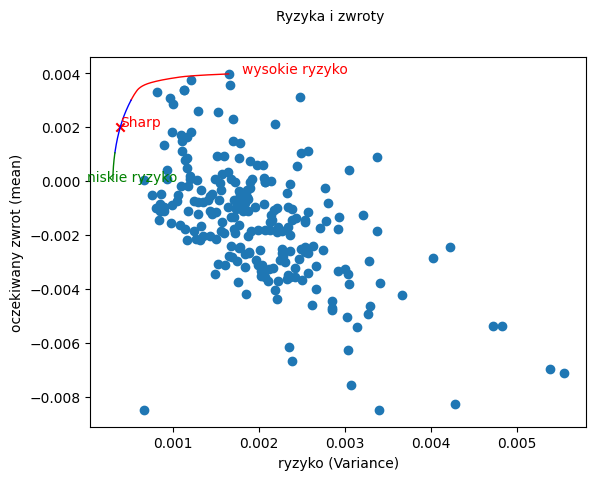

In [ ]:
#ZADANIE 3

import pandas
import numpy as np  

#wczytanie danych do data frame
path_Pareto = '/content/drive/MyDrive/wykresy zadania/Zadanie I - 3/Pareto Front.txt'
path_assets = '/content/drive/MyDrive/wykresy zadania/Zadanie I - 3/assets.txt'

df_Pareto = pandas.read_csv(path_Pareto, delimiter='\t')    #2000 portfeli - dla wykresu liniowego
df_Pareto1 = pandas.read_csv(path_Pareto, delimiter='\t').head(500)  #pierwsze 500 wierszy
df_Pareto2 = pandas.read_csv(path_Pareto, delimiter='\t').iloc[500:1500]  #środek
df_Pareto3 = pandas.read_csv(path_Pareto, delimiter='\t').tail(500)  #ostatnie 500 wierszy
df_assets = pandas.read_csv(path_assets, delimiter='\t')  #do wykresu rozrzutu ryzyko-zwrot

#Kolumny to: Variance	Mean

#Rysowanie wykresu
import matplotlib.pyplot as plt

x_a = df_assets['Variance']
y_a = df_assets['Mean']

x_p = df_Pareto['Variance']
y_p = df_Pareto['Mean']

x_p1 = df_Pareto1['Variance']
y_p1 = df_Pareto1['Mean']
x_p2 = df_Pareto2['Variance']
y_p2 = df_Pareto2['Mean']
x_p3 = df_Pareto3['Variance']
y_p3 = df_Pareto3['Mean']

fig, ax = plt.subplots()
ax.scatter(x_a,y_a)
ax.plot(x_p1,y_p1,"red",linewidth=1.0,label='linia')
ax.plot(x_p2,y_p2,"blue",linewidth=1.0,label='linia')
ax.plot(x_p3,y_p3,"green",linewidth=1.0,label='linia')
plt.text(0.0, 0, "niskie ryzyko", horizontalalignment='left',
         size='medium', color='green')
plt.text(0.0018, 0.004, "wysokie ryzyko", horizontalalignment='left',
         size='medium', color='red')

#środek x i y
x_center = x_p.get(len(x_p)/2)
y_center = y_p.get(len(y_p)/2)

plt.scatter(x_center, y_center, marker='x', color='red')
plt.text(x_center, y_center, "Sharp", horizontalalignment='left',
         size='medium', color='red')

fig.suptitle("Ryzyka i zwroty", fontsize = 10)

ax.set(frame_on=True, xlabel='ryzyko (Variance)', ylabel='oczekiwany zwrot (mean)')

plt.savefig('/content/drive/MyDrive/wykresy zadania/Ryzyka i zwroty', dpi=200)
#rysunek
plt.show()


ZADANIE 4: Dany jest zbiór Abalone z repozytorium UCI Machine Learning
Repository. Zbiór ten zawiera informacje na temat pewnego gatunku
ślimaka morskiego. Pierwszy z atrybutów wskazuje płeć (sex) z
dostępnymi wartościami M,F oraz I (male, female oraz infant). Z kolei
ostatni z atrybutów wskazuje liczbę pierścieni na skorupie i związany jest
z wiekiem. Przedstaw na dwóch wykresach następujące informacje:
Liczba osobników należąca do każdej z kategorii (M, F oraz I);
Średnia liczba pierścieni dla każdej z kategorii (M, F oraz I).
Zdecyduj, jaki typ wykresu najlepiej pozwoli przedstawić powyższe
informacje. Do przygotowania danych użyj skryptów w języku Python lub
dowolnego innego narzędzia.

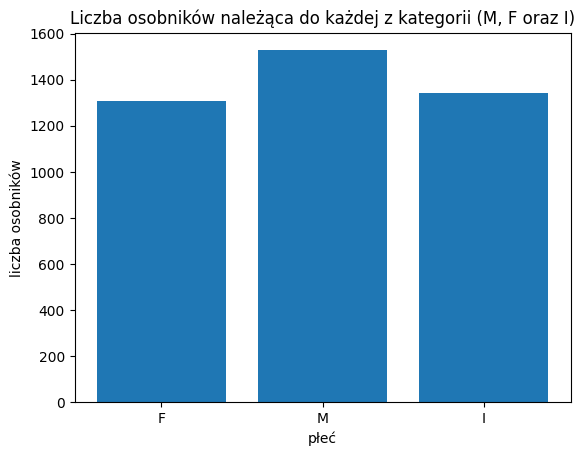

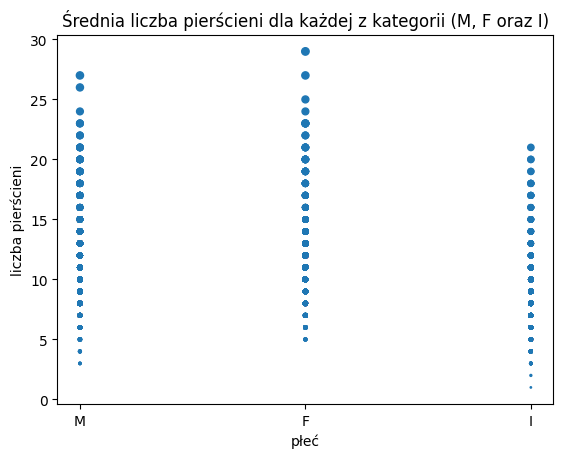

In [ ]:
# ZADANIE 4

import pandas
import numpy as np 
import matplotlib.pyplot as plt

#wczytanie danych do data frame
path_abalone = '/content/drive/MyDrive/Ćwiczenia z wykresów/ABALONE/abalone.data'

df_abalone = pandas.read_csv(path_abalone,header=None)  #brak nagłówka

#obliczanie liczby osobników w każdej z kategorii
sumF = 0
sumM = 0
sumI = 0

for el in range(len(df_abalone[0])):
    if (df_abalone.at[el,0]) == 'F':
        sumF += 1
        
for el in range(len(df_abalone[0])):
    if (df_abalone.at[el,0]) == 'M':
        sumM += 1

for el in range(len(df_abalone[0])):
    if (df_abalone.at[el,0]) == 'I':
        sumI += 1

#wykres słupkowy dla liczby osobników w każdej z kategorii
x = ['F','M','I']
y = [sumF, sumM, sumI]

figure,axes = plt.subplots()

axes.bar(x,y)
axes.set_title('Liczba osobników należąca do każdej z kategorii (M, F oraz I)')
axes.set_xlabel('płeć')
axes.set_ylabel('liczba osobników')
plt.savefig('/content/drive/MyDrive/wykresy zadania/Liczba osobników należąca do każdej z kategorii (M, F oraz I)', dpi=200)

#wykres dla średniej liczby pierścieni dla każdej z kategorii (M, F oraz I)
size = df_abalone[8]
x2 = df_abalone[0]
y2 = df_abalone[8]

fig, ax = plt.subplots()

ax.scatter(x2,y2, s=size)
ax.set_title('Średnia liczba pierścieni dla każdej z kategorii (M, F oraz I)')
ax.set_xlabel('płeć')
ax.set_ylabel('liczba pierścieni')
plt.savefig('/content/drive/MyDrive/wykresy zadania/Średnia liczba pierścieni dla każdej z kategorii (M, F oraz I)', dpi=200)


plt.show()


ZADANIE 5. Dany jest zestaw Abalone z poprzedniego zadania. Na wykresie rozrzutu
(zaznaczając innym kolorem każdą z kategorii M, F oraz I) przedstaw
dane bazując na parametrach: długość (length) oraz całkowita waga
(Whole weight). Dodatkowo wykorzystaj parametr Rings jako informację
wskazującą wielkość poszczególnych obiektów na wykresie. Do
prezentacji zastosuj faceting i przedstaw wyniki na trzech różnych
wykresach (na każdym podkreślając inną kategorię).

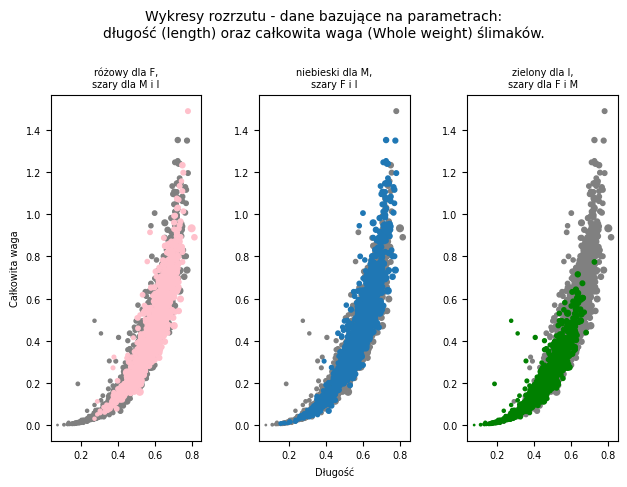

In [ ]:
#ZADANIE 5

import pandas
import numpy as np 
import matplotlib.pyplot as plt

#wczytanie danych do data frame
path_abalone = '/content/drive/MyDrive/Ćwiczenia z wykresów/ABALONE/abalone.data'

df_abalone = pandas.read_csv(path_abalone,header=None)  #brak nagłówka

choose_columns = [1, 5]  # Indeksy wybranych kolumn
criterion_F = (df_abalone.iloc[:, 0] == 'F')  # Warunek dla kolumny 0
criterion_M = (df_abalone.iloc[:, 0] == 'M')  # Warunek dla kolumny 0
criterion_I = (df_abalone.iloc[:, 0] == 'I')  # Warunek dla kolumny 0

data_F = df_abalone.loc[criterion_F, choose_columns]
data_M = df_abalone.loc[criterion_M, choose_columns]
data_I = df_abalone.loc[criterion_I, choose_columns]

size_F = df_abalone.loc[criterion_F, 8] #8 to numer kolumny dla Rings
size_M = df_abalone.loc[criterion_M, 8] 
size_I = df_abalone.loc[criterion_I, 8] 

x1 = (data_F[1])  #Length
y1 = (data_F[5])  #Whole weight
x2 = (data_M[1])  #Length
y2 = (data_M[5])  #Whole weight
x3 = (data_I[1])  #Length
y3 = (data_I[5])  #Whole weight

fig, ax = plt.subplots(1,3)

fig.suptitle('Wykresy rozrzutu - dane bazujące na parametrach:\ndługość (length) oraz całkowita waga (Whole weight) ślimaków.', fontsize=10)

#dodajemy odstępy pomiędzy wykresami
fig.tight_layout()

ax[0].scatter(x2,y2, color = 'gray', s = size_M)
ax[0].scatter(x3,y3, color = 'gray', s = size_I)
ax[0].scatter(x1,y1, color = 'pink', s = size_F)
ax[0].set_title('różowy dla F,\nszary dla M i I',fontsize = 7)    #opisuję każdy z wykresów, tytuł rozdzielam na dwie linijki

ax[1].scatter(x1,y1, color = 'gray', s = size_F)
ax[1].scatter(x3,y3, color = 'gray', s = size_I)
ax[1].scatter(x2,y2, s = size_M)    #kolor jest domyślny czyli niebieski
ax[1].set_title('niebieski dla M,\nszary F i I',fontsize = 7)

ax[2].scatter(x1,y1, color = 'gray', s = size_F)
ax[2].scatter(x2,y2, color = 'gray', s = size_M)
ax[2].scatter(x3,y3, color = 'green', s = size_I)
ax[2].set_title('zielony dla I,\nszary dla F i M',fontsize = 7)
plt.subplots_adjust(top=0.8)    #zwiększam odstęp między tytułem globalnym a wykresem

#ustawiam opis osi tylko po zewnętrznej dla Whole weight i pośrodku środkowego wykresu dla Length (nie ma sensu powtarzać)
ax[1].set_xlabel('Długość', fontsize=7)
ax[0].set_ylabel('Całkowita waga', fontsize=7)

#ustawiam rozmiar etykiet na osiach x i y
ax[0].tick_params(axis='both', labelsize=7)
ax[1].tick_params(axis='both', labelsize=7)
ax[2].tick_params(axis='both', labelsize=7)

plt.savefig('/content/drive/MyDrive/wykresy zadania/Dane bazując na parametrach: długość (length) oraz całkowita waga (Whole weight).png', dpi=(300))
plt.show()


ZADANIE 6: Dany jest zestaw Zoo z repozytorium UCI Machine Learning Repository.
Zbiór ten zawiera informacje o cechach wybranych zwierząt. Na sześciu
wykresach kołowych przedstaw informacje o liczbie zwierząt, które:
posiadają pióra;
znoszą jaja;
latają;
są drapieżnikami;
są jadowite;
mają ogon..

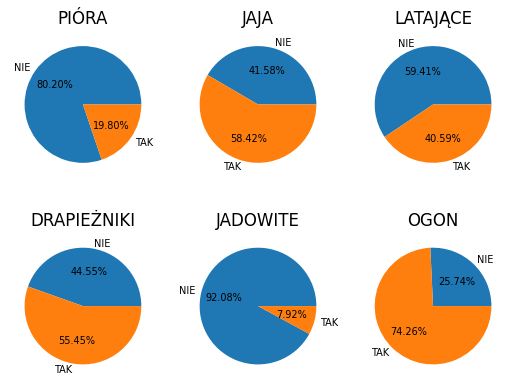

In [ ]:
# ZADANIE 6

import pandas
import matplotlib.pyplot as plt
import numpy as np

#wczytanie danych do data frame
path_10 = '/content/drive/MyDrive/Ćwiczenia z wykresów/zoo.data'

df_10 = pandas.read_csv(path_10, header=None)  #brak nagłówka

#PIÓRA
sumP0 = 0
sumP1 = 0

for el in range(len(df_10[2])):
    if (df_10.at[el,2]) == 0:
        sumP0 += 1

for el in range(len(df_10[2])):
    if (df_10.at[el,2]) == 1:
        sumP1 += 1

fig, axes = plt.subplots(2,3)

labels_1 = ['NIE','TAK']
sizes_1 = [sumP0,sumP1]

axes[0][0].pie(sizes_1, labels=labels_1, autopct='%1.2f%%', textprops={'fontsize': 7})
axes[0][0].set_title('PIÓRA')

#JAJA
sumJ0 = 0
sumJ1 = 0

for el in range(len(df_10[3])):
    if (df_10.at[el,3]) == 0:
        sumJ0 += 1

for el in range(len(df_10[3])):
    if (df_10.at[el,3]) == 1:
        sumJ1 += 1

labels_2 = ['NIE','TAK']
sizes_2 = [sumJ0,sumJ1]

axes[0][1].pie(sizes_2, labels=labels_2, autopct='%1.2f%%', textprops={'fontsize': 7})
axes[0][1].set_title('JAJA')

#LATAJĄCE
sumL0 = 0
sumL1 = 0

for el in range(len(df_10[4])):
    if (df_10.at[el,4]) == 0:
        sumL0 += 1

for el in range(len(df_10[4])):
    if (df_10.at[el,4]) == 1:
        sumL1 += 1

labels_3 = ['NIE','TAK']
sizes_3 = [sumL0,sumL1]

axes[0][2].pie(sizes_3, labels=labels_3, autopct='%1.2f%%', textprops={'fontsize': 7})
axes[0][2].set_title('LATAJĄCE')

#DRAPIEŻNIKI
sumD0 = 0
sumD1 = 0

for el in range(len(df_10[7])):
    if (df_10.at[el,7]) == 0:
        sumD0 += 1

for el in range(len(df_10[7])):
    if (df_10.at[el,7]) == 1:
        sumD1 += 1

labels_4 = ['NIE','TAK']
sizes_4 = [sumD0,sumD1]

axes[1][0].pie(sizes_4, labels=labels_4, autopct='%1.2f%%', textprops={'fontsize': 7})
axes[1][0].set_title('DRAPIEŻNIKI')

#JADOWITE
sumJD0 = 0
sumJD1 = 0

for el in range(len(df_10[11])):
    if (df_10.at[el,11]) == 0:
        sumJD0 += 1

for el in range(len(df_10[11])):
    if (df_10.at[el,11]) == 1:
        sumJD1 += 1

labels_5 = ['NIE','TAK']
sizes_5 = [sumJD0,sumJD1]

axes[1][1].pie(sizes_5, labels=labels_5, autopct='%1.2f%%', textprops={'fontsize': 7})
axes[1][1].set_title('JADOWITE')

#OGON
sumG0 = 0
sumG1 = 0

for el in range(len(df_10[14])):
    if (df_10.at[el,14]) == 0:
        sumG0 += 1

for el in range(len(df_10[14])):
    if (df_10.at[el,14]) == 1:
        sumG1 += 1

labels_6 = ['NIE','TAK']
sizes_6 = [sumG0,sumG1]

axes[1][2].pie(sizes_6, labels=labels_6, autopct='%1.2f%%', textprops={'fontsize': 7})
axes[1][2].set_title('OGON')

plt.savefig('/content/drive/MyDrive/wykresy zadania/Wybrane cechy zwierząt', dpi=200)


plt.show()